In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from matplotlib import rcParams
from scipy.interpolate import make_interp_spline
from scipy.optimize import curve_fit
np.set_printoptions(suppress=True)
from sympy import *
import math
config = {
    "font.family":'serif',
    "font.size": 12,
    "mathtext.fontset":'stix',
    "font.serif": ['Times New Roman'],
}
rcParams.update(config)

计算r值

c:\users\华硕\appdata\local\programs\python\python38\lib\site-packages\matplotlib\mpl-data\matplotlibrc
[0.05971237 0.05736559 0.04928226 0.04615323 0.04172043 0.03806989
 0.03494086 0.03129032]
[ 0.13308212 -0.0507109   3.66669084]
Figure1的相关系数
r： -0.9966910712072692 r-squared： 0.9933930914242938
None
[0.00000258 0.0000041  0.00000607 0.00000715 0.00000823 0.0000088
 0.00001018 0.00001034]
Z为
[0.00629845 0.00999407 0.01479197 0.01742801 0.02006137 0.02145964
 0.02480186 0.02519298]
Figure3的拟合函数：
 
4.806e+04 x + 1.762e+08
求导之后得到斜率：
 
4.806e+04
饱和吸收量为斜率之倒数：
 
2.081e-05


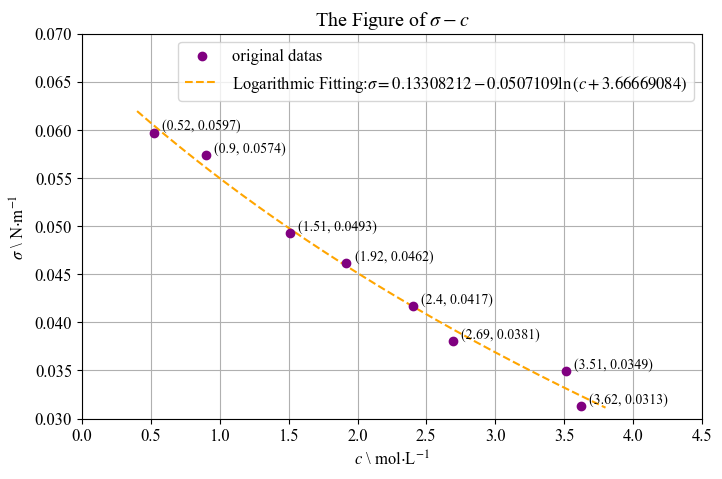

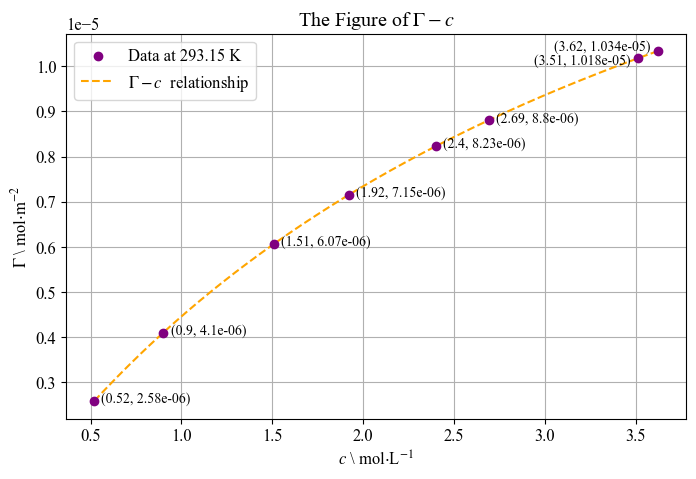

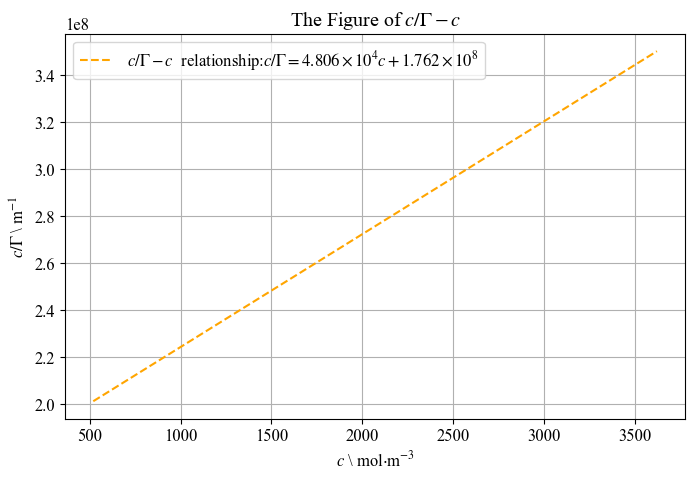

In [3]:
def computeCorrelation(X, Y):
    xBar = np.mean(X)
    yBar = np.mean(Y)
    SSR = 0
    varX = 0
    varY = 0
    for i in range(0, len(X)):
        diffXXBar = X[i] - xBar
        diffYYBar = Y[i] - yBar
        SSR += (diffXXBar * diffYYBar)
        varX += diffXXBar ** 2
        varY += diffYYBar ** 2

    SST = math.sqrt(varX * varY)
    print("r：", SSR / SST, "r-squared：", (SSR / SST) ** 2)
    return

print(matplotlib.matplotlib_fname())
def runplt(size=None):
    plt.figure(figsize=(8,5))
    plt.title(r'The Figure of $\sigma-c$')
    plt.xlabel(r'$c\ $\ mol$\cdot $L$^{-1}$')
    plt.ylabel(r'$\sigma\ $\ N$\cdot $m$^{-1}$')
    plt.axis([0, 4.5,0.03, 0.07])
    # plt.axis([])
    return plt

def runplt1(size=None):
    plt.figure(figsize=(8,5))
    plt.title(r'The Figure of $\Gamma-c$')
    plt.xlabel(r'$c\ $\ mol$\cdot $L$^{-1}$')
    plt.ylabel(r'$\Gamma\ $\ mol$\cdot $m$^{-2}$')
    # plt.axis([0, 4.0, 0, 0.000010])
    # plt.axis([])
    return plt

def runplt2(size=None):
    plt.figure(figsize=(8,5))
    plt.title(r'The Figure of $c/\Gamma-c$')
    plt.xlabel(r'$c\ $\ mol$\cdot $m$^{-3}$')
    plt.ylabel(r'$c/\Gamma \ $\ m$^{-1}$')
    # plt.axis([0, 4.0, 0.03, 0.07])
    # plt.axis([])
    return plt

h = [22.9,22.0,18.9,17.7,16.0,14.6,13.4,12.0]
h = np.array(h)
h = h/100
#切换到国际单位制
s = 0.07275/0.279
s = s*h
print(s)
#求出表面张力s

c = [0.52,0.90,1.51,1.92,2.40,2.69,3.51,3.62]
c = np.array(c)
#单位是mol/L

#Fig1
def funlog(c, a, b, d):
    return a + b * np.log(c + d)
popt, pcov = curve_fit(funlog, c, s,maxfev=50000)
r = funlog(c, *popt)
print(popt)
# x = symbols('c')
print('Figure1的相关系数')
print(computeCorrelation(c, r))

#Fig2
d = popt[1]/(c+popt[2])
gm = -c/8.314
gm = gm/(273.15+20)
gm = gm * d
print(gm)
Z = gm*8.314*(273.15+20)
print('Z为')
print(Z)
#Fig3
c1 = c * 1000
c0 = c1/gm
A = np.polyfit(c1,c0,1)
B = np.poly1d(A)
print('Figure3的拟合函数：')
print(B)
D = B.deriv()
print('求导之后得到斜率：')
print(D)
print('饱和吸收量为斜率之倒数：')
print(1/D)

#Fig1
plt=runplt()
plt.grid(zorder=0)
plt.scatter(c,s,c='purple',marker='o',label='original datas',zorder=3)
c2 = np.linspace(0.4,3.8,500)
s2 = make_interp_spline(c,r)(c2)
plt.plot(c2,s2,ls='--',c='orange',label=r'Logarithmic Fitting:$\sigma = 0.13308212-0.0507109\ln{(c+3.66669084)}$',zorder=2)
plt.legend(loc='upper right')
for X, y in zip(c, s):
    plt.text(X+0.06, y, (np.around(X,2),np.around(y,4)),ha='left', va='bottom', fontsize=10)
plt.savefig('Figure1.pdf',bbox_inches='tight')
plt.show()

#Fig2
plt1=runplt1()
plt1.grid(zorder=0)
plt1.scatter(c,gm,c='purple',marker='o',label='Data at 293.15 K',zorder=3)
c3= np.linspace(0.52,3.62,500)
s3 = make_interp_spline(c,gm)(c3)
plt1.plot(c3,s3,ls='--',c='orange',label=r'$\Gamma-c\ $ relationship',zorder=2)
# plt1.ticklabel_format(style='plain')
plt1.legend(loc='upper left')
for X, y in zip(c, gm[0:6]):
    plt1.text(X+0.04, y-0.0000001, (np.around(X,2),np.around(y,8)),ha='left', va='bottom', fontsize=10)
plt1.text(c[6]-0.04, gm[6]-0.0000002, (np.around(c[6],2),np.around(gm[6],8)),ha='right', va='bottom', fontsize=10)
plt1.text(c[7]-0.04, gm[7]-0.00000005, (np.around(c[7],2),np.around(gm[7],8)),ha='right', va='bottom', fontsize=10)
plt1.savefig('Figure2.pdf',bbox_inches='tight')
plt1.show()

#Fig3
plt2=runplt2()
plt2.grid(zorder=0)
c4= np.linspace(0.52*1000,3.62*1000,500)
s4 = make_interp_spline(c1,c0)(c4)
plt2.plot(c4,s4,ls='--',c='orange',label=r'$c/\Gamma-c\ $ relationship:$c/\Gamma = 4.806\times 10^{4} c + 1.762\times 10^{8}$',zorder=2)
plt2.legend(loc='upper left')
# plt2.text(1,260000, r'$\frac{1}{\Gamma_{\infty}}$', ha='right', va='bottom', fontsize=10)
plt2.savefig('Figure3.pdf',bbox_inches='tight')
plt2.show()